In [129]:
# Import libraries
from umap import UMAP
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import csv
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
# * labels *

In [130]:


iris = datasets.load_iris()
X = iris.data[:,[0,1,2,3]]
y = iris.target


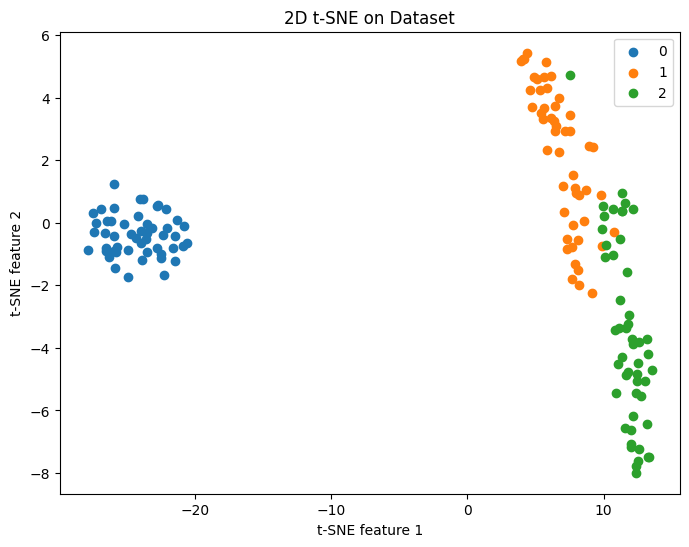

In [131]:
# Initialize t-SNE
#tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_jobs=-1)
tsne = TSNE(n_components=2, n_jobs=-1)

# Run t-SNE and get the transformed 2D representation
X_tsne_2d = tsne.fit_transform(X)


# Scatter plot for each class label
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_tsne_2d[y == i, 0], X_tsne_2d[y == i, 1], label=label)
plt.legend()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('2D t-SNE on Dataset')
plt.show()


Text(0.5, 1.0, '2D UMAP on Dataset')

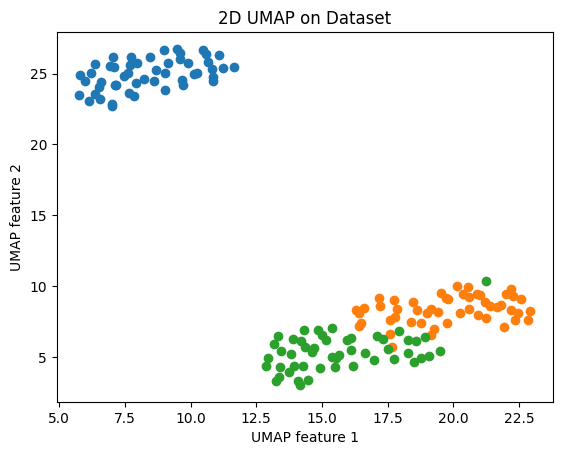

In [132]:
# Initialize UMAP
umap_model = UMAP(n_neighbors=50, min_dist=1,n_components=2, n_jobs=-1)
# Run UMAP and get the transformed 2D representation
X_umap_2d = umap_model.fit_transform(X)

# Scatter plot for each class label
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_umap_2d[y == i, 0], X_umap_2d[y == i, 1], label=label)
#plt.legend()
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.title('2D UMAP on Dataset')

In [133]:
#standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#splits
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

In [134]:
# pca
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [135]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1.0, random_state=1)
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
y_pred_train = lr.predict(X_train_pca)



In [136]:
from sklearn.metrics import classification_report
print("report for training")
print(classification_report(y_train, y_pred_train))
print("report for testing")
print(classification_report(y_test, y_pred))

report for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.84      0.86        37
           2       0.85      0.89      0.87        37

    accuracy                           0.90       105
   macro avg       0.91      0.91      0.91       105
weighted avg       0.91      0.90      0.90       105

report for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



report for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.84      0.86        37
           2       0.85      0.89      0.87        37

    accuracy                           0.90       105
   macro avg       0.91      0.91      0.91       105
weighted avg       0.91      0.90      0.90       105

report for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45

## percision
how well did it guess that class right 
- true pos and true neg

## recall
how well was it right
- true pos and false neg


In [137]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_train_pca, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)
test_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_test_pca, y=y_test, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

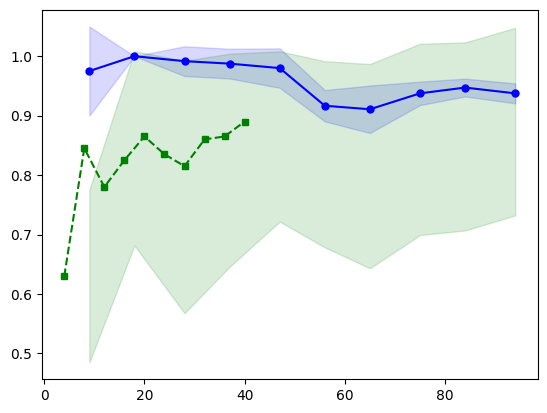

In [138]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)
# plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(test_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.show()